<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Richard_Goldsmith_LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-02 00:06:24--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.40M   891KB/s    in 25s     

2019-05-02 00:06:49 (880 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22444881]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [5]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4816.58","4816.58","1130.71","1130.71","783.42","347.29","0.0","0.0","0.0","Apr-2019","190.21","May-2019","Apr-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.95

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd

In [13]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows = 1)
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128414, 144)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    10000.0      10000.0          10000.0   36 months   
1  NaN        NaN     4000.0       4000.0           4000.0   36 months   
2  NaN        NaN     5000.0       5000.0           5000.0   36 months   
3  NaN        NaN     9600.0       9600.0           9600.0   36 months   
4  NaN        NaN     2500.0       2500.0           2500.0   36 months   

  int_rate  installment grade sub_grade  ...  \
0   10.33%       324.23     B        B1  ...   
1   23.40%       155.68     E        E1  ...   
2   17.97%       180.69     D        D1  ...   
3   12.98%       323.37     B        B5  ...   
4   13.56%        84.92     C        C1  ...   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount  debt_settlement_flag  \
0                          NaN                     N   
1                          NaN                     N   
2                          NaN                     N   
3                          NaN                     N   
4                          NaN                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage  settlement_term  
0               NaN                    NaN              NaN  
1               NaN                    NaN              NaN  
2               NaN                    NaN              NaN  
3               NaN                    NaN              NaN  
4               NaN                    NaN              NaN  

[5 rows x 144 columns]

In [20]:
pd.options.display.max_rows = 500  # Sets the max number of rows to display output
pd.options.display.max_columns = 500 #Sets the  max number of columns to diplay output

df.isnull().sum().sort_values(ascending = False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

In [21]:
df.tail()    #Notice the last two rows don't include actual data

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
128407 NaN        NaN      23000        23000          23000.0   36 months   
128408 NaN        NaN      10000        10000          10000.0   36 months   
128409 NaN        NaN       5000         5000           5000.0   36 months   
128410 NaN        NaN      10000        10000           9750.0   36 months   
128411 NaN        NaN      10000        10000          10000.0   36 months   

       int_rate  installment grade sub_grade             emp_title emp_length  \
128407   15.02%       797.53     C        C3        Tax Consultant  10+ years   
128408   15.02%       346.76     C        C3        security guard    5 years   
128409   13.56%       169.83     C        C1          Payoff Clerk  10+ years   
128410   11.06%       327.68     B        B3                   NaN        NaN   
128411   16.91%       356.08     C        C5  Key Accounts Manager    2 years   

       home_ownership  annual_inc verification_status   issue_d  loan_status  \
128407       MORTGAGE     75000.0     Source Verified  Oct-2018  Charged Off   
128408       MORTGAGE     38000.0        Not Verified  Oct-2018      Current   
128409       MORTGAGE     35360.0        Not Verified  Oct-2018      Current   
128410           RENT     44400.0     Source Verified  Oct-2018      Current   
128411           RENT     80000.0        Not Verified  Oct-2018      Current   

       pymnt_plan  url  desc             purpose                    title  \
128407          n  NaN   NaN  debt_consolidation       Debt consolidation   
128408          n  NaN   NaN  debt_consolidation       Debt consolidation   
128409          n  NaN   NaN  debt_consolidation       Debt consolidation   
128410          n  NaN   NaN         credit_card  Credit card refinancing   
128411          n  NaN   NaN               other                    Other   

       zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
128407    352xx         AL  20.95            1         Aug-1985   
128408    443xx         OH  13.16            3         Jul-1982   
128409    381xx         TN  11.30            1         Jun-2006   
128410    980xx         WA  11.78            0         Oct-2008   
128411    021xx         MA  17.72            1         Sep-2006   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
128407               2                    22.0                     NaN   
128408               0                     6.0                     NaN   
128409               0                    21.0                     NaN   
128410               2                    40.0                     NaN   
128411               0                    14.0                     NaN   

        open_acc  pub_rec  revol_bal revol_util  total_acc  \
128407        12        0      22465      43.6%         28   
128408        11        0       5634      37.1%         16   
128409         9        0       2597      27.3%         15   
128410        15        0       6269      13.1%         25   
128411        17        0       1942      30.8%         31   

       initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
128407                   w       0.00           0.00      1547.08   
128408                   w    8628.13        8628.13      2072.22   
128409                   f    4300.52        4300.52      1015.21   
128410                   f    8553.96        8340.11      1950.72   
128411                   w    8662.68        8662.68      2127.09   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
128407          1547.08          1025.67         521.41                 0.0   
128408          2072.22          1371.87         700.35                 0.0   
128409          1015.21           699.48         315.73                 0.0   
128410          1901.95          1446.04         504.68                 0.0   
128411          2127.09          1337.32         789.77                 0.0  

In [24]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows = 1, skipfooter = 2, engine = 'python') #Engine avoids error
print(df.shape)
df.head()

(128412, 144)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN       4000         4000           4000.0   36 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       9600         9600           9600.0   36 months   
4 NaN        NaN       2500         2500           2500.0   36 months   

  int_rate  installment grade sub_grade       emp_title emp_length  \
0   10.33%       324.23     B        B1             NaN   < 1 year   
1   23.40%       155.68     E        E1        Security    3 years   
2   17.97%       180.69     D        D1  Administrative    6 years   
3   12.98%       323.37     B        B5             NaN        NaN   
4   13.56%        84.92     C        C1            Chef  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0       MORTGAGE    280000.0        Not Verified  Dec-2018     Current   
1           RENT     90000.0     Source Verified  Dec-2018     Current   
2       MORTGAGE     59280.0     Source Verified  Dec-2018     Current   
3       MORTGAGE     35704.0        Not Verified  Dec-2018     Current   
4           RENT     55000.0        Not Verified  Dec-2018     Current   

  pymnt_plan  url  desc             purpose               title zip_code  \
0          n  NaN   NaN  debt_consolidation  Debt consolidation    974xx   
1          n  NaN   NaN  debt_consolidation  Debt consolidation    070xx   
2          n  NaN   NaN  debt_consolidation  Debt consolidation    490xx   
3          n  NaN   NaN    home_improvement    Home improvement    401xx   
4          n  NaN   NaN  debt_consolidation  Debt consolidation    109xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         OR   6.15            2         Jan-1996               0   
1         NJ  26.33            0         Sep-2006               4   
2         MI  10.51            0         Apr-2011               0   
3         KY   0.84            0         Nov-2003               0   
4         NY  18.24            0         Apr-2001               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    18.0                     NaN        14        0   
1                    59.0                     NaN        15        0   
2                     NaN                     NaN         8        0   
3                    69.0                     NaN         5        0   
4                     NaN                    45.0         9        1   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0       9082        38%         23                   w    9035.04   
1       5199      19.2%         20                   w    3680.07   
2       4599      19.1%         13                   w    4567.57   
3        748      11.5%         23                   w    8934.25   
4       4341      10.3%         34                   w    2269.45   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        9035.04      1288.31          1288.31           964.96   
1        3680.07       614.92           614.92           319.93   
2        4567.57       715.27           715.27           432.43   
3        8934.25       994.35           994.35           665.75   
4        2269.45       336.86           336.86           230.55   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         323.35                 0.0         0.0                      0.0   
1         294.99                 0.0         0.0                      0.0   
2         282.84                 0.0         0.0                      0.0   
3         328.60                 0.0         0.0                      0.0   
4         106.31                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Apr-2019           324.23     May-2019 

In [25]:
df.isnull().sum().sort_values(ascending = False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [26]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [27]:
df['int_rate']  #Object type typically means contains a string. The % sign converts the column to string.
# In order to work with it we need it to be in int/float format.

0          10.33%
1          23.40%
2          17.97%
3          12.98%
4          13.56%
5          18.94%
6          20.89%
7          11.80%
8          23.40%
9          19.92%
10         13.56%
11         17.97%
12         14.47%
13         26.31%
14         23.40%
15         23.40%
16         20.89%
17         14.47%
18         15.02%
19         26.31%
20         15.02%
21         14.47%
22         16.14%
23         11.31%
24         27.27%
25         11.31%
26         23.40%
27         10.33%
28         18.94%
29         11.31%
30         16.14%
31         11.80%
32         23.40%
33         12.98%
34         10.72%
35         11.80%
36         12.98%
37         11.80%
38         10.72%
39         14.47%
40         20.89%
41         19.92%
42         14.47%
43         10.33%
44          6.46%
45         11.31%
46         17.97%
47         15.02%
48         18.94%
49         17.97%
50         11.80%
51         16.91%
52         14.47%
53         14.47%
54         11.31%
55        

In [28]:
df.describe()  #By default, only pulls in numeric columns

id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  0.0        0.0  128412.000000  128412.000000    128412.000000   
mean   NaN        NaN   15971.321021   15971.321021     15968.498166   
std    NaN        NaN   10150.384233   10150.384233     10152.168970   
min    NaN        NaN    1000.000000    1000.000000       725.000000   
25%    NaN        NaN    8000.000000    8000.000000      8000.000000   
50%    NaN        NaN   14000.000000   14000.000000     14000.000000   
75%    NaN        NaN   21600.000000   21600.000000     21600.000000   
max    NaN        NaN   40000.000000   40000.000000     40000.000000   

         installment    annual_inc  url  desc            dti    delinq_2yrs  \
count  128412.000000  1.284120e+05  0.0   0.0  128175.000000  128412.000000   
mean      463.259353  8.279733e+04  NaN   NaN      19.933178       0.227837   
std       285.718256  1.082985e+05  NaN   NaN      20.143542       0.733793   
min        30.480000  0.000000e+00  NaN   NaN       0.000000       0.000000   
25%       253.630000  4.705800e+04  NaN   NaN      11.760000       0.000000   
50%       382.905000  6.800000e+04  NaN   NaN      17.990000       0.000000   
75%       622.680000  9.900000e+04  NaN   NaN      25.300000       0.000000   
max      1618.240000  9.757200e+06  NaN   NaN     999.000000      24.000000   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
count   128412.000000            56216.000000            15450.000000   
mean         0.447038               36.880337               86.130162   
std          0.734480               21.813805               21.880055   
min          0.000000                0.000000                5.000000   
25%          0.000000               19.000000               72.000000   
50%          0.000000               34.000000               90.000000   
75%          1.000000               53.000000              104.000000   
max          5.000000              160.000000              119.000000   

            open_acc        pub_rec     revol_bal      total_acc  \
count  128412.000000  128412.000000  1.284120e+05  128412.000000   
mean       11.564052       0.121850  1.689800e+04      22.677413   
std         5.981599       0.332825  2.408255e+04      12.129216   
min         0.000000       0.000000  0.000000e+00       2.000000   
25%         7.000000       0.000000  5.599000e+03      14.000000   
50%        10.000000       0.000000  1.119950e+04      21.000000   
75%        15.000000       0.000000  2.056300e+04      29.000000   
max        94.000000       6.000000  2.358150e+06     160.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  128412.000000  128412.000000  128412.000000    128412.000000   
mean    13711.864974   13709.598275    3008.351796      3007.677793   
std      9661.429518    9662.595566    3918.785402      3918.675809   
min         0.000000       0.000000       0.000000         0.000000   
25%      6345.050000    6343.250000    1270.830000      1269.950000   
50%     11356.870000   11356.870000    2037.730000      2036.835000   
75%     19080.200000   19080.200000    3381.680000      3381.560000   
max     40000.000000   40000.000000   43313.650218     43313.650000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    128412.000000  128412.000000       128412.000000  128412.000000   
mean       2221.392599     786.691946            0.200736       0.066512   
std        3804.749308     641.729149            3.009185      12.650756   
min           0.000000       0.000000            0.000000       0.000000   
25%         787.230000     314.715000            0.000000       0.000000   
50%        1282.010000     602.970000            0.000000       0.000000   
75%        2174.100000    1077.985000            0.000000       0.000000   
max       40000.000000    6075.170000          177.420000    3444.480000   

       collection_recovery_fee  last_pymnt_amnt  co

In [29]:
df.describe(exclude = 'number')  #Excludes numerical and returns categorical..shows number of 
# categories, mode (top), and frequency of mode(top)

term int_rate   grade sub_grade emp_title emp_length  \
count       128412   128412  128412    128412    107465     116708   
unique           2       46       7        35     43892         11   
top      36 months   13.56%       A        A4   Teacher  10+ years   
freq         88179     6975   38011      9770      2090      38826   

       home_ownership verification_status   issue_d loan_status pymnt_plan  \
count          128412              128412    128412      128412     128412   
unique              4                   3         3           7          1   
top          MORTGAGE        Not Verified  Oct-2018     Current          n   
freq            63490               58350     46305      119540     128412   

                   purpose               title zip_code addr_state  \
count               128412              128412   128412     128412   
unique                  12                  12      880         50   
top     debt_consolidation  Debt consolidation    112xx         CA   
freq                 70603               70603     1370      17879   

       earliest_cr_line revol_util initial_list_status last_pymnt_d  \
count            128412     128256              128412       128253   
unique              644       1074                   2            7   
top            Aug-2006         0%                   w     Apr-2019   
freq               1130       1132              114498       120098   

       next_pymnt_d last_credit_pull_d application_type  \
count        121726             128411           128412   
unique            3                  9                2   
top        May-2019           Apr-2019       Individual   
freq         121689             123017           111630   

       verification_status_joint sec_app_earliest_cr_line hardship_flag  \
count                      14848                    16782        128412   
unique                         3                      573             1   
top                 Not Verified                 Aug-2006             N   
freq                        6360                      155        128412   

                          hardship_type hardship_reason hardship_status  \
count                                 1               1               1   
unique                                1               1               1   
top     INTEREST ONLY-3 MONTHS DEFERRAL    UNEMPLOYMENT       COMPLETED   
freq                                  1               1               1   

       hardship_start_date hardship_end_date payment_plan_start_date  \
count                    1                 1                       1   
unique                   1                 1                       1   
top               Feb-2019          Apr-2019                Feb-2019   
freq                     1                 1                       1   

       hardship_loan_status debt_settlement_flag debt_settlement_flag_date  \
count                     1               128412                         7   
unique                    1                    2                         2   
top       Late (16-30 days)                    N                  Mar-2019   
freq                      1               128405                         5   

       settlement_status settlement_date  
count                  7               7  
unique                 2               3  
top               ACTIVE        Mar-2019  
freq                   5               3

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [30]:
'13.56%'.strip('%')  #Removes '%' sign but still reads as a string

'13.56'

In [31]:
type('13.56%'.strip('%'))

str

In [32]:
float('13.56%'.strip('%'))  #Run float on the fucntion to convert it during processing.

13.56

In [33]:
type(float('13.56%'.strip('%')))

float

In [34]:
def remove_percent(string):         # Create the function that will remove the percent sign
  return float(string.strip('%'))   # using the function we created to work on one item

remove_percent('13.55%')

13.55

Apply the function to the `int_rate` column

In [35]:
df['int_rate'] = df['int_rate'].apply(remove_percent)  #Use apply method to iterate function over 
df['int_rate'].head()                                  # entire column

                                                       # Notice that it changed the column type 
                                                       # from object to float.

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

###DataFrame Filtering by Interest Rate

In [36]:
int_rate_greater_than_13 = df[df['int_rate'] >= 13.00]

int_rate_greater_than_13

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1      NaN        NaN       4000         4000      4000.000000   36 months   
2      NaN        NaN       5000         5000      5000.000000   36 months   
4      NaN        NaN       2500         2500      2500.000000   36 months   
5      NaN        NaN      30000        30000     30000.000000   60 months   
6      NaN        NaN      23000        23000     23000.000000   60 months   
8      NaN        NaN       8000         8000      8000.000000   36 months   
9      NaN        NaN      10000        10000     10000.000000   60 months   
10     NaN        NaN      12000        12000     12000.000000   60 months   
11     NaN        NaN      16000        16000     16000.000000   60 months   
12     NaN        NaN      15000        15000     14975.000000   60 months   
13     NaN        NaN      16000        16000     16000.000000   60 months   
14     NaN        NaN      13000        13000     13000.000000   36 months   
15     NaN        NaN       9600         9600      9600.000000   36 months   
16     NaN        NaN       3500         3500      3500.000000   36 months   
17     NaN        NaN      12000        12000     12000.000000   60 months   
18     NaN        NaN      35000        35000     35000.000000   60 months   
19     NaN        NaN      30000        30000     30000.000000   60 months   
20     NaN        NaN      24000        24000     24000.000000   36 months   
21     NaN        NaN      16000        16000     16000.000000   36 months   
22     NaN        NaN      14000        14000     14000.000000   36 months   
24     NaN        NaN      24000        24000     24000.000000   60 months   
26     NaN        NaN       7075         7075      7075.000000   36 months   
28     NaN        NaN       4000         4000      4000.000000   36 months   
30     NaN        NaN      25000        25000     25000.000000   60 months   
32     NaN        NaN       1250         1250      1250.000000   36 months   
39     NaN        NaN      15000        15000     15000.000000   60 months   
40     NaN        NaN      30000        30000     30000.000000   60 months   
41     NaN        NaN      35000        35000     35000.000000   60 months   
42     NaN        NaN      10000        10000     10000.000000   60 months   
46     NaN        NaN      16500        16500     16500.000000   60 months   
47     NaN        NaN       6000         6000      6000.000000   36 months   
48     NaN        NaN      35000        35000     35000.000000   60 months   
49     NaN        NaN       3000         3000      3000.000000   36 months   
51     NaN        NaN       8800         8800      8800.000000   36 months   
52     NaN        NaN      25000        25000     25000.000000   60 months   
53     NaN        NaN      12000        12000     12000.000000   60 months   
55     NaN        NaN       8250         8250      8250.000000   36 months   
56     NaN        NaN      35000        35000     35000.000000   60 months   
57     NaN        NaN       8500         8500      8500.000000   36 months   
58     NaN        NaN      40000        40000     40000.000000   60 months   
61     NaN        NaN      11000        11000     11000.000000   36 months   
62     NaN        NaN      12000        12000     12000.000000   36 months   
63     NaN        NaN      15000        15000     15000.000000   60 months   
66     NaN        NaN      34575        34575     34575.000000   60 months   
67     NaN        NaN       1200         1200      1200.000000   36 months   
68     NaN        NaN       5400         5400      5400.000000   36 months   
69     NaN        NaN       1000         1000      1000.000000   36 months   
70     NaN        NaN      10000        10000     10000.000000   36 months   
71     NaN        NaN      10000        10000     10000.000000   36 months   
72     NaN        NaN      25000        25000     25000.000000   36 months   
75     NaN        NaN      150

### Clean `emp_title`

Look at top 20 titles

In [40]:
df['emp_title'].value_counts(dropna = False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [39]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [42]:
import numpy as np

examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

def clean_title(title):
  if isinstance(title, str):     #If what we pass through is a string
    return title.strip().title()     #strip whitespace and treat it as a title (capitalize first letter)
  else:
    return "Unknown"             #If not a string (np.NaN values are floats), change to 'Unknown'.
  
[clean_title(x) for x in examples]    #List comprehension rather than 'apply' used above

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [43]:
df['emp_title'] = df['emp_title'].apply(clean_title)

df['emp_title'].head()

0           Unknown
1          Security
2    Administrative
3           Unknown
4              Chef
Name: emp_title, dtype: object

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
#Don't use dot notation df.index when trying to create a new column... 
#Use bracket indexing df['']

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')


In [47]:
managers = df[df['emp_title_manager'] == True]
plebians = df[df['emp_title_manager'] == False]

print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.760639190246609
12.957670587172387


In [48]:
print(managers['int_rate'].std())
print(plebians['int_rate'].std())

5.070984210942662
5.09297273180173


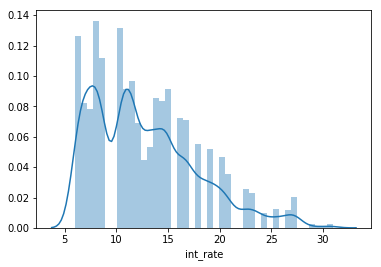

In [50]:
import seaborn as sns

sns.distplot(managers['int_rate']);

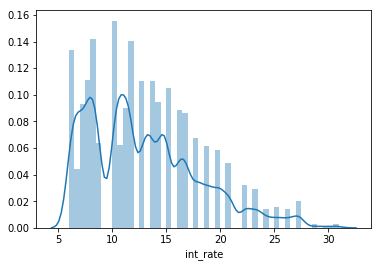

In [51]:
sns.distplot(plebians['int_rate']);

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [52]:
df['issue_d'].head().values  #Notice that these dates are interpreted as strings

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [53]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format = True)

df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [54]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [56]:
df['issue_year'] = df['issue_d'].dt.year  #Adds a column to dataframe with the issue year
df['issue_month'] = df['issue_d'].dt.month

df['issue_month'].value_counts()

10    46305
11    41973
12    40134
Name: issue_month, dtype: int64

In [57]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format = True)

In [59]:
df['issue_d'] - df['earliest_cr_line'] #Calculates time between current issue date and first loan date.

0         8370 days
1         4474 days
2         2801 days
3         5509 days
4         6453 days
5        11506 days
6         7973 days
7         4870 days
8         8735 days
9         4992 days
10        4870 days
11        4809 days
12        7001 days
13        3013 days
14        4232 days
15        5570 days
16        5174 days
17        3409 days
18        5113 days
19        4079 days
20        5113 days
21        6239 days
22        5023 days
23        3287 days
24        7243 days
25        4627 days
26        4992 days
27        5782 days
28        2891 days
29        5023 days
30        5570 days
31        2282 days
32        2891 days
33        1979 days
34        2648 days
35        4901 days
36        7062 days
37        9862 days
38       11201 days
39       10015 days
40        1522 days
41        4413 days
42        3378 days
43        1522 days
44        5997 days
45        3136 days
46        6270 days
47        1522 days
48        6635 days
49        6331 days


In [60]:
df['days_from_earliest_credit_to_issue'] = (
    df['issue_d'] - df['earliest_cr_line']).dt.days

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN       4000         4000           4000.0   36 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       9600         9600           9600.0   36 months   
4 NaN        NaN       2500         2500           2500.0   36 months   

   int_rate  installment grade sub_grade       emp_title emp_length  \
0     10.33       324.23     B        B1         Unknown   < 1 year   
1     23.40       155.68     E        E1        Security    3 years   
2     17.97       180.69     D        D1  Administrative    6 years   
3     12.98       323.37     B        B5         Unknown        NaN   
4     13.56        84.92     C        C1            Chef  10+ years   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0       MORTGAGE    280000.0        Not Verified 2018-12-01     Current   
1           RENT     90000.0     Source Verified 2018-12-01     Current   
2       MORTGAGE     59280.0     Source Verified 2018-12-01     Current   
3       MORTGAGE     35704.0        Not Verified 2018-12-01     Current   
4           RENT     55000.0        Not Verified 2018-12-01     Current   

  pymnt_plan  url  desc             purpose               title zip_code  \
0          n  NaN   NaN  debt_consolidation  Debt consolidation    974xx   
1          n  NaN   NaN  debt_consolidation  Debt consolidation    070xx   
2          n  NaN   NaN  debt_consolidation  Debt consolidation    490xx   
3          n  NaN   NaN    home_improvement    Home improvement    401xx   
4          n  NaN   NaN  debt_consolidation  Debt consolidation    109xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         OR   6.15            2       1996-01-01               0   
1         NJ  26.33            0       2006-09-01               4   
2         MI  10.51            0       2011-04-01               0   
3         KY   0.84            0       2003-11-01               0   
4         NY  18.24            0       2001-04-01               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    18.0                     NaN        14        0   
1                    59.0                     NaN        15        0   
2                     NaN                     NaN         8        0   
3                    69.0                     NaN         5        0   
4                     NaN                    45.0         9        1   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0       9082        38%         23                   w    9035.04   
1       5199      19.2%         20                   w    3680.07   
2       4599      19.1%         13                   w    4567.57   
3        748      11.5%         23                   w    8934.25   
4       4341      10.3%         34                   w    2269.45   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        9035.04      1288.31          1288.31           964.96   
1        3680.07       614.92           614.92           319.93   
2        4567.57       715.27           715.27           432.43   
3        8934.25       994.35           994.35           665.75   
4        2269.45       336.86           336.86           230.55   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         323.35                 0.0         0.0                      0.0   
1         294.99                 0.0         0.0                      0.0   
2         282.84                 0.0         0.0                      0.0   
3         328.60                 0.0         0.0                      0.0   
4         106.31                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Apr-2019           324.23  

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [3]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip

import pandas as pd

df = pd.read_csv('LoanStats_2018Q4.csv', skiprows = 1, skipfooter = 2, engine = 'python')
df.head()

--2019-05-03 01:46:25--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  21.40M  1.69MB/s    in 13s     

2019-05-03 01:46:43 (1.68 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22444881]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN       4000         4000           4000.0   36 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       9600         9600           9600.0   36 months   
4 NaN        NaN       2500         2500           2500.0   36 months   

  int_rate  installment grade sub_grade  ...  \
0   10.33%       324.23     B        B1  ...   
1   23.40%       155.68     E        E1  ...   
2   17.97%       180.69     D        D1  ...   
3   12.98%       323.37     B        B5  ...   
4   13.56%        84.92     C        C1  ...   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount  debt_settlement_flag  \
0                          NaN                     N   
1                          NaN                     N   
2                          NaN                     N   
3                          NaN                     N   
4                          NaN                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage  settlement_term  
0               NaN                    NaN              NaN  
1               NaN                    NaN              NaN  
2               NaN                    NaN              NaN  
3               NaN                    NaN              NaN  
4               NaN                    NaN              NaN  

[5 rows x 144 columns]

In [9]:
df['term'] = (df['term'].str.extract('(\d+)', expand = False)).astype('int64')

df['term'].head()

0    36
1    36
2    36
3    36
4    36
Name: term, dtype: int64

In [13]:
import numpy as np

df['loan_status_is_great'] = np.where(df['loan_status'].str.contains('Current|Fully Paid'), 1, 0)

df['loan_status_is_great'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: loan_status_is_great, dtype: int64

In [14]:
df['loan_status'].head(20)

0     Current
1     Current
2     Current
3     Current
4     Current
5     Current
6     Current
7     Current
8     Current
9     Current
10    Current
11    Current
12    Current
13    Current
14    Current
15    Current
16    Current
17    Current
18    Current
19    Current
Name: loan_status, dtype: object

In [0]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format = True)

df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

In [20]:
df['last_pymnt_d_month'].head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: last_pymnt_d_month, dtype: float64

In [21]:
df['last_pymnt_d_year'].head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

In [22]:
pd.options.display.max_rows = 500  
pd.options.display.max_columns = 500 

df.head(25)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  \
0  NaN        NaN      10000        10000          10000.0    36   10.33%   
1  NaN        NaN       4000         4000           4000.0    36   23.40%   
2  NaN        NaN       5000         5000           5000.0    36   17.97%   
3  NaN        NaN       9600         9600           9600.0    36   12.98%   
4  NaN        NaN       2500         2500           2500.0    36   13.56%   
5  NaN        NaN      30000        30000          30000.0    60   18.94%   
6  NaN        NaN      23000        23000          23000.0    60   20.89%   
7  NaN        NaN      32075        32075          32075.0    60   11.80%   
8  NaN        NaN       8000         8000           8000.0    36   23.40%   
9  NaN        NaN      10000        10000          10000.0    60   19.92%   
10 NaN        NaN      12000        12000          12000.0    60   13.56%   
11 NaN        NaN      16000        16000          16000.0    60   17.97%   
12 NaN        NaN      15000        15000          14975.0    60   14.47%   
13 NaN        NaN      16000        16000          16000.0    60   26.31%   
14 NaN        NaN      13000        13000          13000.0    36   23.40%   
15 NaN        NaN       9600         9600           9600.0    36   23.40%   
16 NaN        NaN       3500         3500           3500.0    36   20.89%   
17 NaN        NaN      12000        12000          12000.0    60   14.47%   
18 NaN        NaN      35000        35000          35000.0    60   15.02%   
19 NaN        NaN      30000        30000          30000.0    60   26.31%   
20 NaN        NaN      24000        24000          24000.0    36   15.02%   
21 NaN        NaN      16000        16000          16000.0    36   14.47%   
22 NaN        NaN      14000        14000          14000.0    36   16.14%   
23 NaN        NaN      28000        28000          28000.0    36   11.31%   
24 NaN        NaN      24000        24000          24000.0    60   27.27%   

    installment grade sub_grade                                 emp_title  \
0        324.23     B        B1                                       NaN   
1        155.68     E        E1                                  Security   
2        180.69     D        D1                            Administrative   
3        323.37     B        B5                                       NaN   
4         84.92     C        C1                                      Chef   
5        777.23     D        D2                               Postmaster    
6        620.81     D        D4                                  Operator   
7        710.26     B        B4                        Nursing Supervisor   
8        311.35     E        E1                                   Manager   
9        264.50     D        D3                          Material Handler   
10       276.49     C        C1                                       NaN   
11       406.04     D        D1                 Instructional Coordinator   
12       352.69     C        C2                                       NaN   
13       481.99     E        E4          Financial Relationship Associate   
14       505.95     E        E1                       Sale Representative   
15       373.62     E        E1                       driver coordinator    
16       131.67     D        D4                             gas attendant   
17       282.16     C        C2  Assistant Athletic Director of Marketing   
18       833.02     C        C3                          Sr Sales Manager   
19       903.73     E        E4                               Casino Host   
20       832.21     C        C3                      MAINTENANCE PLANNER    
21       550.51     C        C2                                 Carpenter   
22       493.17     C        C4                                       NaN   
23       920.81     B        B3        Executive Administrative Assistant   
24       736.73     E        E5                       Firefighter/captain   

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01